# Definition of the RFM Analysis

The RFM analysis is a marketing technique for analyzing customers.<br>
RFM is clustering customers based on 3 aspects:

- R for Recency:
When was the customer last purchase? <br>
You take the last order date from the hole data and add one day.<br>
Then you can calculate the Duration since the last purchase for each customer.<br>

- F for Frequency:<br>
How often did the customer make an order during the analysis periode?

- M for Monetary:<br>
How much did the customer spent?<br>

For further Information you can read [this artikel](https://cdn.intechopen.com/pdfs/13162/InTech-Data_mining_using_rfm_analysis.pdf)

# The Data

The source of the used data is on [kaggle](https://www.kaggle.com/benroshan/ecommerce-data)

The data includes 3 csv files:
1. List of Orders <br>
This dataset contains purchase information. The information includes ID, Date of Purchase and customer details
2. Order Details <br>
This dataset contains order ID, with the order price, quantity,profit, category and subcategory of product
3. Sales target <br>
This dataset contains sales target amount and date for each product category

# Importing

I use pandas for analysis <br>
and seaborn for plotting.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

In [2]:
%matplotlib inline

# Data Preparation

## List of Orders

In [3]:
list_of_orders_df = pd.read_csv('data/List of Orders.csv')

In [4]:
list_of_orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 560 entries, 0 to 559
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Order ID      500 non-null    object
 1   Order Date    500 non-null    object
 2   CustomerName  500 non-null    object
 3   State         500 non-null    object
 4   City          500 non-null    object
dtypes: object(5)
memory usage: 22.0+ KB


In [5]:
list_of_orders_df.describe()

,Order ID,Order Date,CustomerName,State,City
count,500,500,500,500,500
unique,500,307,332,19,24
top,B-25697,24-11-2018,Shreya,Madhya Pradesh,Indore
freq,1,7,6,101,76


In [6]:
list_of_orders_df.head()

,Order ID,Order Date,CustomerName,State,City
0,B-25601,01-04-2018,Bharat,Gujarat,Ahmedabad
1,B-25602,01-04-2018,Pearl,Maharashtra,Pune
2,B-25603,03-04-2018,Jahan,Madhya Pradesh,Bhopal
3,B-25604,03-04-2018,Divsha,Rajasthan,Jaipur
4,B-25605,05-04-2018,Kasheen,West Bengal,Kolkata


In [7]:
list_of_orders_df.tail()

,Order ID,Order Date,CustomerName,State,City
555,NaN,NaN,NaN,NaN,NaN
556,NaN,NaN,NaN,NaN,NaN
557,NaN,NaN,NaN,NaN,NaN
558,NaN,NaN,NaN,NaN,NaN
559,NaN,NaN,NaN,NaN,NaN


The List of orders data has rows where every value is NaN.<br>
I have to drop them.

In [8]:
list_of_orders_df.dropna(axis=0, how='all', inplace=True)

In [9]:
list_of_orders_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Order ID      500 non-null    object
 1   Order Date    500 non-null    object
 2   CustomerName  500 non-null    object
 3   State         500 non-null    object
 4   City          500 non-null    object
dtypes: object(5)
memory usage: 23.4+ KB


60 Rows were removed.

In [10]:
list_of_orders_df.nunique(axis=0)

Order ID        500
Order Date      307
CustomerName    332
State            19
City             24
dtype: int64

In [11]:
list_of_orders_df = pd.read_csv('data/List of Orders.csv')
list_of_orders_df.dropna(axis=0, how='all', inplace=True)

In [12]:
list_of_orders_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Order ID      500 non-null    object
 1   Order Date    500 non-null    object
 2   CustomerName  500 non-null    object
 3   State         500 non-null    object
 4   City          500 non-null    object
dtypes: object(5)
memory usage: 23.4+ KB


In [13]:
list_of_orders_df.dtypes

Order ID        object
Order Date      object
CustomerName    object
State           object
City            object
dtype: object

The "Order Date" column is an object <br>
and has not a date typ..

In [14]:
list_of_orders_df["Order Date"] = pd.to_datetime(list_of_orders_df['Order Date'])

I am finished with the List of Orders Data.

In [15]:
list_of_orders_df = pd.read_csv('data/List of Orders.csv')
list_of_orders_df.dropna(axis=0, how='all', inplace=True)
list_of_orders_df["Order Date"] = pd.to_datetime(list_of_orders_df['Order Date'])

In [16]:
list_of_orders_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Order ID      500 non-null    object        
 1   Order Date    500 non-null    datetime64[ns]
 2   CustomerName  500 non-null    object        
 3   State         500 non-null    object        
 4   City          500 non-null    object        
dtypes: datetime64[ns](1), object(4)
memory usage: 23.4+ KB


## Order Details

In [17]:
order_details_df = pd.read_csv('data/Order Details.csv')

In [18]:
order_details_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Order ID      1500 non-null   object 
 1   Amount        1500 non-null   float64
 2   Profit        1500 non-null   float64
 3   Quantity      1500 non-null   int64  
 4   Category      1500 non-null   object 
 5   Sub-Category  1500 non-null   object 
dtypes: float64(2), int64(1), object(3)
memory usage: 70.4+ KB


In [19]:
order_details_df.head()

,Order ID,Amount,Profit,Quantity,Category,Sub-Category
0,B-25601,1275.0,-1148.0,7,Furniture,Bookcases
1,B-25601,66.0,-12.0,5,Clothing,Stole
2,B-25601,8.0,-2.0,3,Clothing,Hankerchief
3,B-25601,80.0,-56.0,4,Electronics,Electronic Games
4,B-25602,168.0,-111.0,2,Electronics,Phones


In [20]:
order_details_df.nunique()

Order ID        500
Amount          585
Profit          401
Quantity         14
Category          3
Sub-Category     17
dtype: int64

The data types for Amount, Profit and Quantity are correct.

In [21]:
order_details_df = pd.read_csv('data/Order Details.csv')

In [22]:
order_details_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Order ID      1500 non-null   object 
 1   Amount        1500 non-null   float64
 2   Profit        1500 non-null   float64
 3   Quantity      1500 non-null   int64  
 4   Category      1500 non-null   object 
 5   Sub-Category  1500 non-null   object 
dtypes: float64(2), int64(1), object(3)
memory usage: 70.4+ KB


In [23]:
order_details_df.head()

,Order ID,Amount,Profit,Quantity,Category,Sub-Category
0,B-25601,1275.0,-1148.0,7,Furniture,Bookcases
1,B-25601,66.0,-12.0,5,Clothing,Stole
2,B-25601,8.0,-2.0,3,Clothing,Hankerchief
3,B-25601,80.0,-56.0,4,Electronics,Electronic Games
4,B-25602,168.0,-111.0,2,Electronics,Phones


In [24]:
order_details_df = pd.read_csv('data/Order Details.csv')

## Sales Target

In [25]:
sales_target_df = pd.read_csv('data/Sales target.csv')

In [26]:
sales_target_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Month of Order Date  36 non-null     object 
 1   Category             36 non-null     object 
 2   Target               36 non-null     float64
dtypes: float64(1), object(2)
memory usage: 992.0+ bytes


In [27]:
sales_target_df.head()

,Month of Order Date,Category,Target
0,Apr-18,Furniture,10400.0
1,May-18,Furniture,10500.0
2,Jun-18,Furniture,10600.0
3,Jul-18,Furniture,10800.0
4,Aug-18,Furniture,10900.0


I don't need the Sales Target Data for the RFM Analysis. <br>
I will ignore it.

## Data Joining

I will join now the List of Orders and Order Details Data.

In [28]:
list_of_orders_df = pd.read_csv('data/List of Orders.csv')
list_of_orders_df.dropna(axis=0, how='all', inplace=True)
list_of_orders_df["Order Date"] = pd.to_datetime(list_of_orders_df['Order Date'])

In [29]:
list_of_orders_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Order ID      500 non-null    object        
 1   Order Date    500 non-null    datetime64[ns]
 2   CustomerName  500 non-null    object        
 3   State         500 non-null    object        
 4   City          500 non-null    object        
dtypes: datetime64[ns](1), object(4)
memory usage: 23.4+ KB


In [30]:
order_details_df = pd.read_csv('data/Order Details.csv')

In [31]:
order_details_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Order ID      1500 non-null   object 
 1   Amount        1500 non-null   float64
 2   Profit        1500 non-null   float64
 3   Quantity      1500 non-null   int64  
 4   Category      1500 non-null   object 
 5   Sub-Category  1500 non-null   object 
dtypes: float64(2), int64(1), object(3)
memory usage: 70.4+ KB


In [32]:
# I am using the Inner Join type.
sales_data_df = pd.merge(list_of_orders_df, order_details_df,
                        on='Order ID')

In [33]:
sales_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1500 entries, 0 to 1499
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Order ID      1500 non-null   object        
 1   Order Date    1500 non-null   datetime64[ns]
 2   CustomerName  1500 non-null   object        
 3   State         1500 non-null   object        
 4   City          1500 non-null   object        
 5   Amount        1500 non-null   float64       
 6   Profit        1500 non-null   float64       
 7   Quantity      1500 non-null   int64         
 8   Category      1500 non-null   object        
 9   Sub-Category  1500 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(6)
memory usage: 128.9+ KB


In [34]:
sales_data_df.head()

,Order ID,Order Date,CustomerName,State,City,Amount,Profit,Quantity,Category,Sub-Category
0,B-25601,2018-01-04,Bharat,Gujarat,Ahmedabad,1275.0,-1148.0,7,Furniture,Bookcases
1,B-25601,2018-01-04,Bharat,Gujarat,Ahmedabad,66.0,-12.0,5,Clothing,Stole
2,B-25601,2018-01-04,Bharat,Gujarat,Ahmedabad,8.0,-2.0,3,Clothing,Hankerchief
3,B-25601,2018-01-04,Bharat,Gujarat,Ahmedabad,80.0,-56.0,4,Electronics,Electronic Games
4,B-25602,2018-01-04,Pearl,Maharashtra,Pune,168.0,-111.0,2,Electronics,Phones


# Creating the RFM Dataframes

## Recency

I will calculate the Duration since the last purchase for each customer. <br>
First i need the max of the Order Date and then i add 1 day.

In [35]:
sales_data_df['Order Date'].max()

Timestamp('2019-12-03 00:00:00')

In [36]:
# I will use this date for calculating the Duration
max_order_date = dt.date(2019,12,10)

In [37]:
max_order_date

datetime.date(2019, 12, 10)

Now we group the Sales Dataframe by Customer Name <br>
and the max Order Date.

In [38]:
sales_data_recency_df = sales_data_df.groupby(by='CustomerName', as_index=False)['Order Date'].max()
# I will rename the Order Date to Last_purchase_date
sales_data_recency_df.columns = ['CustomerName', 'Last_purchase_date']

In [39]:
sales_data_recency_df.head()

,CustomerName,Last_purchase_date
0,Aakanksha,2018-01-07
1,Aarushi,2019-03-22
2,Aashna,2018-04-12
3,Aastha,2018-10-26
4,Aayush,2018-11-15


Now we calculate the Recency (in days) <br>
by substracting the max_order_Date (2019-12-10) from the Last_purchase_date

In [40]:
sales_data_recency_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 332 entries, 0 to 331
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   CustomerName        332 non-null    object        
 1   Last_purchase_date  332 non-null    datetime64[ns]
dtypes: datetime64[ns](1), object(1)
memory usage: 7.8+ KB


In [41]:
# Last_purchase_date is an obejct,
# i need to transform it into date type
sales_data_recency_df['Last_purchase_date'] = pd.to_datetime(sales_data_recency_df['Last_purchase_date'])
sales_data_recency_df['Last_purchase_date'] = sales_data_recency_df['Last_purchase_date'].dt.date

In [42]:
sales_data_recency_df ['Recency'] = sales_data_recency_df['Last_purchase_date'].apply(lambda x:(max_order_date - x).days)

In [43]:
sales_data_recency_df.head()

,CustomerName,Last_purchase_date,Recency
0,Aakanksha,2018-01-07,702
1,Aarushi,2019-03-22,263
2,Aashna,2018-04-12,607
3,Aastha,2018-10-26,410
4,Aayush,2018-11-15,390


In [44]:
sales_data_recency_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 332 entries, 0 to 331
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   CustomerName        332 non-null    object
 1   Last_purchase_date  332 non-null    object
 2   Recency             332 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 10.4+ KB


## Frequency

Frequency helps us to know how many times a customer purchased from us. <br>
To do that we need to check **how many invoices are registered by the same customer.**

In [45]:
sales_data_df.head()

,Order ID,Order Date,CustomerName,State,City,Amount,Profit,Quantity,Category,Sub-Category
0,B-25601,2018-01-04,Bharat,Gujarat,Ahmedabad,1275.0,-1148.0,7,Furniture,Bookcases
1,B-25601,2018-01-04,Bharat,Gujarat,Ahmedabad,66.0,-12.0,5,Clothing,Stole
2,B-25601,2018-01-04,Bharat,Gujarat,Ahmedabad,8.0,-2.0,3,Clothing,Hankerchief
3,B-25601,2018-01-04,Bharat,Gujarat,Ahmedabad,80.0,-56.0,4,Electronics,Electronic Games
4,B-25602,2018-01-04,Pearl,Maharashtra,Pune,168.0,-111.0,2,Electronics,Phones


In [46]:
sales_data_frequency_df_copy = sales_data_df
# First we need to drop duplicates
# baseed on Customer Name and Order ID
sales_data_frequency_df_copy.drop_duplicates(subset=['CustomerName', 'Order ID'], keep='first', inplace = True)

I group the dataframe by Customer Name <br>
and count the number of Order IDs / number of purchase.

In [47]:
sales_data_frequency_df = sales_data_frequency_df_copy.groupby(by=['CustomerName'], as_index = False)['Order ID'].count()
sales_data_frequency_df.columns = ['CustomerName', 'Frequency']
sales_data_frequency_df.head()

,CustomerName,Frequency
0,Aakanksha,1
1,Aarushi,3
2,Aashna,1
3,Aastha,1
4,Aayush,1


## Monetary

Monetary attribute answers the question: <br>
__How much money did the customer spent over time?__

In [48]:
sales_data_monetary_df_copy = sales_data_df

In [49]:
sales_data_monetary_df = sales_data_monetary_df_copy.groupby (by=['CustomerName'], as_index = False)['Amount'].sum()
sales_data_monetary_df.columns = ['CustomerName', 'Monetary']
sales_data_monetary_df.head()

,CustomerName,Monetary
0,Aakanksha,33.0
1,Aarushi,2049.0
2,Aashna,355.0
3,Aastha,41.0
4,Aayush,128.0


## Summary of the partial Dataframes

I will concatenate all 3 dataframe.

In [50]:
temp_df = sales_data_recency_df.merge(sales_data_frequency_df, on = 'CustomerName')
temp_df.head()

,CustomerName,Last_purchase_date,Recency,Frequency
0,Aakanksha,2018-01-07,702,1
1,Aarushi,2019-03-22,263,3
2,Aashna,2018-04-12,607,1
3,Aastha,2018-10-26,410,1
4,Aayush,2018-11-15,390,1


In [51]:
rfm_df = temp_df.merge(sales_data_monetary_df, on = 'CustomerName')
# The Csutomer Name Column will be the index.
rfm_df.set_index('CustomerName', inplace = True)
rfm_df.head()

,Last_purchase_date,Recency,Frequency,Monetary
CustomerName,,,,
Aakanksha,2018-01-07,702,1,33.0
Aarushi,2019-03-22,263,3,2049.0
Aashna,2018-04-12,607,1,355.0
Aastha,2018-10-26,410,1,41.0
Aayush,2018-11-15,390,1,128.0


# The RFM Analysis

In [52]:
rfm_df.head()

,Last_purchase_date,Recency,Frequency,Monetary
CustomerName,,,,
Aakanksha,2018-01-07,702,1,33.0
Aarushi,2019-03-22,263,3,2049.0
Aashna,2018-04-12,607,1,355.0
Aastha,2018-10-26,410,1,41.0
Aayush,2018-11-15,390,1,128.0


## Creating RFM Segments

To create a Scoring System and Customer CLustering <br>
the values for Recency, Frequency and Monetary has to be replaced. <br>
I will create 5 Buckets based on quantiles.

In [53]:
# RFM Quatiles
quantiles = rfm_df.quantile(q=[0.2, 0.4, 0.6, 0.8])
quantiles

,Recency,Frequency,Monetary
0.2,263.0,1.0,58.4
0.4,335.0,1.0,141.4
0.6,411.6,1.0,280.0
0.8,509.6,2.0,636.0


In the table you can see diffent clusters for each bucket. <br>
The 0.2 Quantile for the Monetary is 58.4. <br>
That means that 20 % of the customers spent less than 58.4. <br>
20 % of the customers made more than 2 Orders (Frequence = 2).

---

In [54]:
quantiles.to_dict()

{'Recency': {0.2: 263.0, 0.4: 335.00000000000006, 0.6: 411.6, 0.8: 509.6},
 'Frequency': {0.2: 1.0, 0.4: 1.0, 0.6: 1.0, 0.8: 2.0},
 'Monetary': {0.2: 58.400000000000006, 0.4: 141.4, 0.6: 280.0, 0.8: 636.0}}

For assigning a score, <br>
we have to create a function.<br>

Arguments (x = value, p = recency, monetary_value, frequency, d = quartiles dict)<br>
based on where the customers value for recency, frequency and montary is,<br>
the customer will get a scoring value for R F M.<br>

In [55]:
# For the R Score:
# The smaller the better
def RScore(x,p,d):
    if x <= d[p][0.2]:
        return 5
    elif x <= d[p][0.4]:
        return 4
    elif x <= d[p][0.6]: 
        return 3
    elif x <= d[p][0.8]: 
        return 2
    else:
        return 1

In [56]:
# For the Frequency and Monetary Score it's its complete the reverse order.
# A higher value is better.

def F_M_Score(x,p,d):
    if x <= d[p][0.2]:
        return 1
    elif x <= d[p][0.4]:
        return 2
    elif x <= d[p][0.6]: 
        return 3
    elif x <= d[p][0.8]: 
        return 4
    else:
        return 5

In [57]:
rfm_segmentation = rfm_df
rfm_segmentation['R_Quartile'] = rfm_segmentation['Recency'].apply(RScore, args=('Recency',quantiles,))
rfm_segmentation['F_Quartile'] = rfm_segmentation['Frequency'].apply(F_M_Score, args=('Frequency',quantiles,))
rfm_segmentation['M_Quartile'] = rfm_segmentation['Monetary'].apply(F_M_Score, args=('Monetary',quantiles,))

In [58]:
rfm_segmentation.head()

,Last_purchase_date,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile
CustomerName,,,,,,,
Aakanksha,2018-01-07,702,1,33.0,1,1,1
Aarushi,2019-03-22,263,3,2049.0,5,5,5
Aashna,2018-04-12,607,1,355.0,1,1,4
Aastha,2018-10-26,410,1,41.0,3,1,1
Aayush,2018-11-15,390,1,128.0,3,1,2


## Calculating the RFM Score

Now you can combine the 3 Scores to one overall **RFM-Score.** <br>
I concatanate the R-, F- and M-Quantile.

In [59]:
rfm_segmentation['RFMScore'] = rfm_segmentation.R_Quartile.map(str) \
                            + rfm_segmentation.F_Quartile.map(str) \
                            + rfm_segmentation.M_Quartile.map(str)
rfm_segmentation.head()

,Last_purchase_date,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMScore
CustomerName,,,,,,,,
Aakanksha,2018-01-07,702,1,33.0,1,1,1,111
Aarushi,2019-03-22,263,3,2049.0,5,5,5,555
Aashna,2018-04-12,607,1,355.0,1,1,4,114
Aastha,2018-10-26,410,1,41.0,3,1,1,311
Aayush,2018-11-15,390,1,128.0,3,1,2,312


## Cluster

I will define the cluster.

In [60]:
print("Best Customers: ",len(rfm_segmentation[rfm_segmentation['RFMScore']=='555']))
print('Loyal Customers: ',len(rfm_segmentation[rfm_segmentation['F_Quartile']==5]))
print("Big Spenders: ",len(rfm_segmentation[rfm_segmentation['M_Quartile']==5]))
print('Almost Lost: ', len(rfm_segmentation[rfm_segmentation['RFMScore']=='344']))
print('Lost Customers: ',len(rfm_segmentation[rfm_segmentation['RFMScore']=='244']))
print('Lost Cheap Customers: ',len(rfm_segmentation[rfm_segmentation['RFMScore']=='111']))

Best Customers:  12
Loyal Customers:  50
Big Spenders:  67
Almost Lost:  2
Lost Customers:  1
Lost Cheap Customers:  18


We have 12 Best Customer. <br>
This customers have 5 Score in the Recency, Frequency and Monetary Quartile.

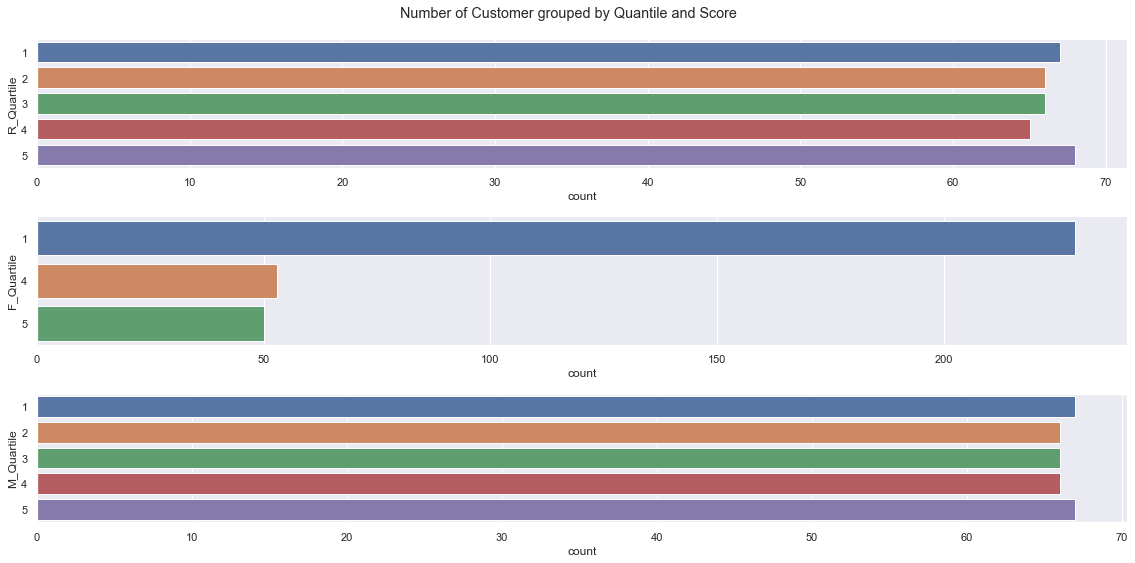

In [61]:
sns.set_palette('Paired')
sns.set(rc={'image.cmap': 'coolwarm'})
fig,axes = plt.subplots(3,1,figsize = (16,8))
fig.suptitle ('Number of Customer grouped by Quantile and Score')
sns.countplot(y = rfm_segmentation.R_Quartile,ax = axes[0])
sns.countplot(y = rfm_segmentation.F_Quartile,ax = axes[1])
sns.countplot(y = rfm_segmentation.M_Quartile,ax = axes[2])
plt.style.use('fivethirtyeight')
plt.tight_layout()


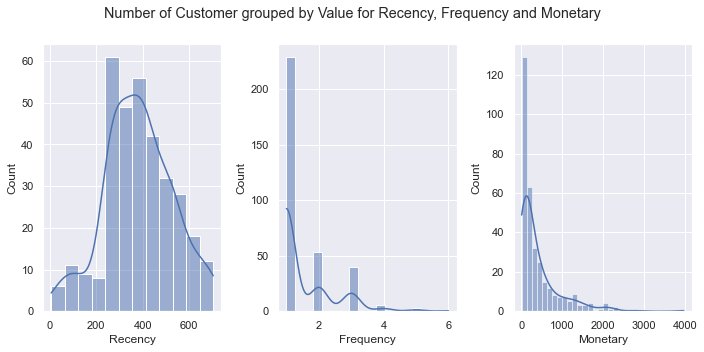

In [62]:
sns.set_palette('Paired')
sns.set(rc={'image.cmap': 'coolwarm'})

# with this command you have 3 plots next to each other,
# and define each plot size
fig,axes = plt.subplots(1,3,figsize = (10,5))
fig.suptitle ('Number of Customer grouped by Value for Recency, Frequency and Monetary')
sns.histplot(x = rfm_segmentation.Recency, ax = axes[0], kde = True)
sns.histplot(x = rfm_segmentation.Frequency, ax = axes[1], kde = True)
sns.histplot(x = rfm_segmentation.Monetary, ax = axes[2], kde = True)
plt.style.use('fivethirtyeight')
plt.tight_layout()

# Questions

## How much Money did the Big Customers spent in each Product Category?

In [63]:
# First i need a list of the customers, who spent the most
big_spender_customers = rfm_segmentation[rfm_segmentation['M_Quartile']==5].reset_index()
list_group_big_spender_customers = big_spender_customers['CustomerName'].tolist()

In [64]:
sales_data_copy_temp = sales_data_df

In [65]:
# Only Customer who are 'Big Customers' will be considered
# with the help of the "isin" Function
sales_data_big_customers = sales_data_copy_temp[sales_data_copy_temp['CustomerName'].isin(list_group_big_spender_customers)]

In [66]:
sales_data_big_customers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145 entries, 0 to 1497
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Order ID      145 non-null    object        
 1   Order Date    145 non-null    datetime64[ns]
 2   CustomerName  145 non-null    object        
 3   State         145 non-null    object        
 4   City          145 non-null    object        
 5   Amount        145 non-null    float64       
 6   Profit        145 non-null    float64       
 7   Quantity      145 non-null    int64         
 8   Category      145 non-null    object        
 9   Sub-Category  145 non-null    object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(6)
memory usage: 12.5+ KB


In [67]:
sales_data_big_customers_group = sales_data_big_customers.groupby (by='Category', as_index = False)['Amount'].sum()

[Text(0.5, 1.0, 'Amount per Category from Big Customers')]

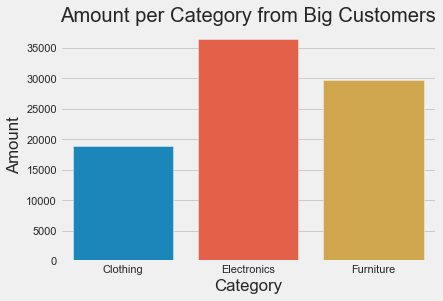

In [68]:
sales_data_big_customers_group_plot = sns.barplot(data = sales_data_big_customers_group, x='Category', y='Amount' )
sales_data_big_customers_group_plot.set(title = 'Amount per Category from Big Customers' )